### Comparazione vari SLIM Elsatic

In [1]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np 

In [2]:
path_save= "Daniele/Recommenders/SSLIM_Elastic/saved_models"
if not os.path.exists(path_save):
    os.makedirs(path_save)

In [3]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Evaluation.Evaluator import EvaluatorHoldout

import Daniele.Utils.MyDataManager as dm 
import Daniele.Utils.MatrixManipulation as mm
import Daniele.Utils.SaveSparceMatrix as ssm

URMv = dm.getURMviews()
URMo = dm.getURMopen()
ICMt=dm.getICMt()
ICMl=dm.getICMl()

name="train.csv"
dir = os.path.join(path_save,name)
if not os.path.exists(dir):
    URMv_train, URMv_test = split_train_in_two_percentage_global_sample(URMv, train_percentage = 0.80)

    ssm.saveMatrix(dir,URMv_train)

    name="test.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,URMv_test)

    urm_def = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo,icml=ICMl,icmt=ICMt, normalize=True, add_aug=True,appendICM=True)
    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_def)

    urm_bin = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo, normalize=False, add_aug=True)
    urm_bin.data = np.ones(len(urm_bin.data))
    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_bin)

else:
    URMv_train=ssm.readMatrix(dir)

    name="test.csv"
    dir = os.path.join(path_save,name)
    URMv_test=ssm.readMatrix(dir)

    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    urm_def = ssm.readMatrix(dir)

    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    urm_bin = ssm.readMatrix(dir)



/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team


In [4]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np

### SLIIM-Elastic REFERENCE 0.05732

In [5]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="slim_reference"
dir = os.path.join(path_save,name)

slim_reference = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    slim_reference.fit(alpha=7.3447282e-7, l1_ratio=0.007759, topK=739)
    slim_reference.save_model(path_save,name)
else:
    slim_reference.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.


100%|██████████| 27968/27968 [51:50<00:00,  8.99it/s]   


SLIMElasticNetRecommender: Saving model in file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelsslim_reference'
SLIMElasticNetRecommender: Saving complete


### SLIM-Elastic Submit hybrid 

In [6]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="submit_hybrid_federico"
dir = os.path.join(path_save,name)

submit_hybrid_federico = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    submit_hybrid_federico.fit(alpha=0.003271, l1_ratio=0.006095, topK=884)
    submit_hybrid_federico.save_model(path_save,name)
else:
    submit_hybrid_federico.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.


100%|██████████| 27968/27968 [31:00<00:00, 15.03it/s]


SLIMElasticNetRecommender: Saving model in file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelssubmit_hybrid_federico'
SLIMElasticNetRecommender: Saving complete


### SLIM-Elastic opt HIGH

In [7]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="slim_elastic_high"
dir = os.path.join(path_save,name)

slim_elastic_high = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    # {'alpha': 0.002930092866966509, 'l1_ratio': 0.006239337272696024, 'topK': 882} -> MAP 0.0422894
    slim_elastic_high.fit(alpha=0.002930092866966509, l1_ratio=0.006239337272696024, topK=882)
    slim_elastic_high.save_model(path_save,name)
else:
    slim_elastic_high.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.


100%|██████████| 27968/27968 [30:32<00:00, 15.26it/s]


SLIMElasticNetRecommender: Saving model in file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelsslim_elastic_high'
SLIMElasticNetRecommender: Saving complete


### Users group

In [8]:
import numpy as np 
import scipy.sparse as sps

profile_length = np.ediff1d(sps.csr_matrix(URMv).indptr)
profile_length, profile_length.shape

block_size = int(len(profile_length)*0.05)
sorted_users = np.argsort(profile_length)

for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
Group 2, #users in group 2081, average p.len 10.69, median 11.0, min 10, max 11
Group 3, #users in group 2081, average p.len 11.83, median 12.0, min 11, max 12
Group 4, #users in group 2081, average p.len 12.88, median 13.0, min 12, max 13
Group 5, #users in group 2081, average p.len 13.92, median 14.0, min 13, max 14
Group 6, #users in group 2081, average p.len 14.92, median 15.0, min 14, max 15
Group 7, #users in group 2081, average p.len 16.00, median 16.0, min 15, max 17
Group 8, #users in group 2081, average p.len 17.22, median 17.0, min 17, max 18
Group 9, #users in group 2081, average p.len 18.42, median 18.0, min 18, max 19
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
Group 12, #users in group 2081, average p.len

In [9]:
MAP_recommender_per_group = {}
recommender_object_dict = {}

recommender_class = {"slim_reference" :slim_reference,
                     "submit_hybrid_federico" : submit_hybrid_federico,
                     "slim_elastic_high" : slim_elastic_high,              
                     }


for label, recommender_obj in recommender_class.items():
    recommender_object_dict[label] = recommender_obj

In [10]:
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URMv_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1625 (100.0%) in 1.37 sec. Users per second: 1182
EvaluatorHoldout: Processed 1625 (100.0%) in 1.37 sec. Users per second: 1186
EvaluatorHoldout: Processed 1625 (100.0%) in 1.34 sec. Users per second: 1209
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1844 (100.0%) in 2.01 sec. Users per second: 919
EvaluatorHoldout: Processed 1844 (100.0%) in 3.20 sec. Users per second: 577
EvaluatorHoldout: Processed 1844 (100.0%) in 2.01 sec. Users per second: 919
Group 2, #users in group 2081, average p.len 10.69, median 11.0, min 10, max 11
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that h

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2048 (100.0%) in 1.72 sec. Users per second: 1193


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.94 sec. Users per second: 1055


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.86 sec. Users per second: 1103
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2047 (100.0%) in 1.70 sec. Users per second: 1204
EvaluatorHoldout: Processed 2047 (100.0%) in 1.90 sec. Users per second: 1078
EvaluatorHoldout: Processed 2047 (100.0%) in 1.91 sec. Users per second: 1071
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2064 (100.0%) in 1.73 sec. Users per second: 1196
EvaluatorHoldout: Processed 2064 (100.0%) in 2.00 sec. Users per second: 1030
EvaluatorHoldout: Processed 2064 (100.0%) in 1.98 sec. Users per second: 1040
Group 12, #users in group 2081, average p.

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.39 sec. Users per second: 869


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.38 sec. Users per second: 876


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


Group 18, #users in group 2081, average p.len 54.12, median 54.0, min 48, max 62
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.01 sec. Users per second: 1037


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.44 sec. Users per second: 853


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.48 sec. Users per second: 839


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


Group 19, #users in group 2081, average p.len 87.91, median 78.0, min 62, max 281
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.30 sec. Users per second: 905
EvaluatorHoldout: Processed 2081 (100.0%) in 2.74 sec. Users per second: 760
EvaluatorHoldout: Processed 2081 (100.0%) in 2.69 sec. Users per second: 774


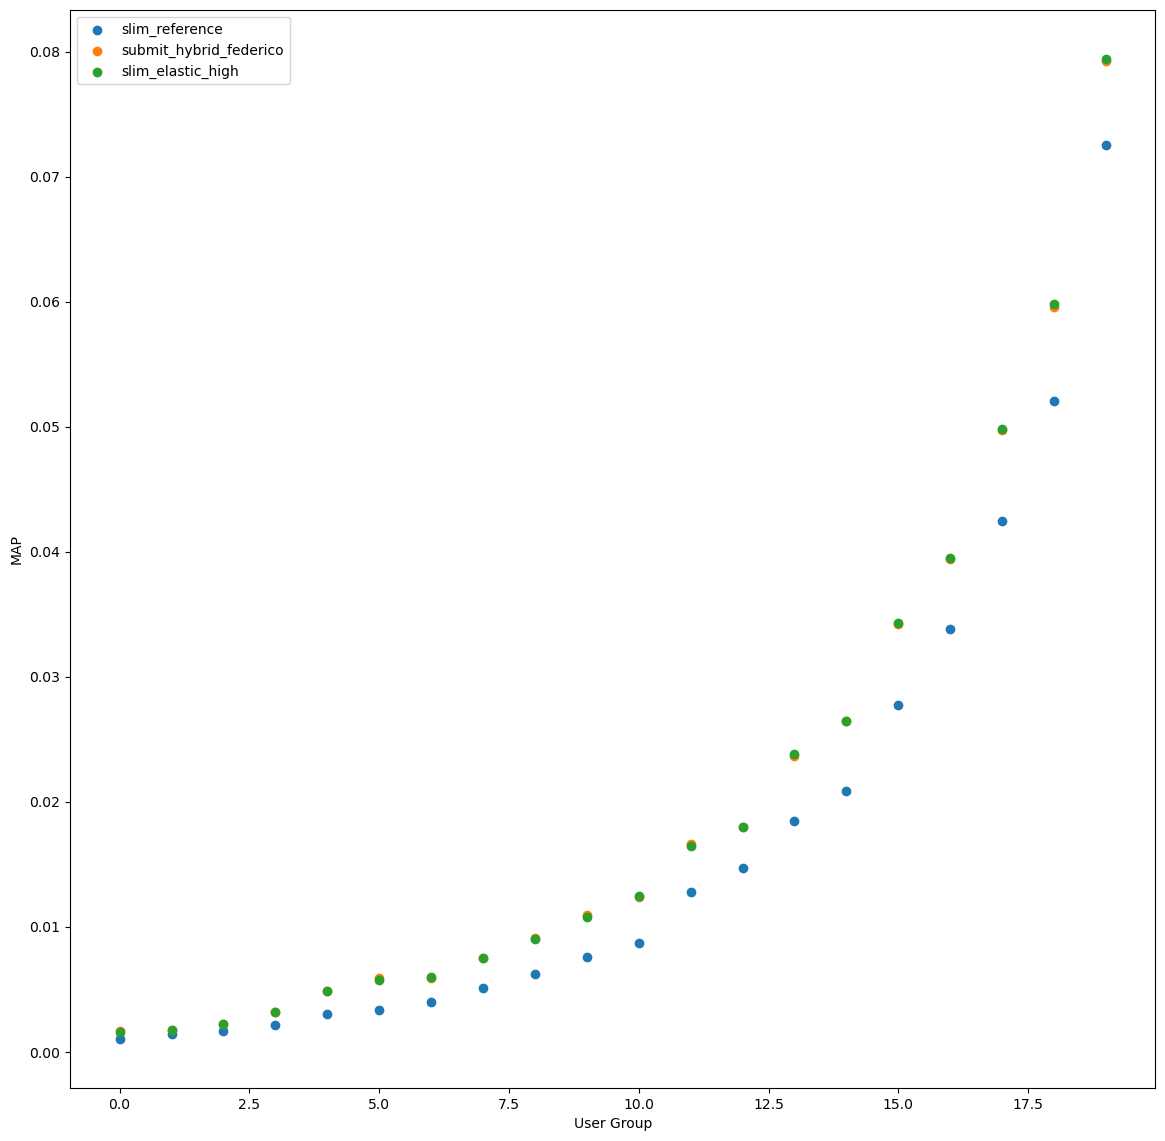

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(14, 14))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label,)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

In [12]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(slim_elastic_high)
ris

EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 40070 (100.0%) in 24.65 sec. Users per second: 1626


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.042855,0.072939,0.068376,0.021321,0.035733,0.141354,NaN,0.052688,0.282705,0.172032,...,0.96255,0.272118,0.96255,0.016824,8.968007,0.995176,0.038472,0.666857,3.618898,0.268092
